In [ ]:
import os.path
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from sklearn.preprocessing import LabelEncoder

In [ ]:
print(os.getcwd()) 

In [ ]:
base_dir = os.chdir(os.getcwd() + "/img-fashion")
print(os.getcwd())

In [ ]:
data_list = glob('*.jpg')
print('파일 개수 >> ', len(data_list))
print('파일 목록 타입 >> ', type(data_list))

In [ ]:
token = text_to_word_sequence(data_list[0])
print(token)

In [ ]:
label = []
for x in data_list:
    token = text_to_word_sequence(x)
    label.append(token[0])
print(len(label))

In [ ]:
items = label
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label

In [ ]:
data_height = 150
data_width = 150
channel_n = 3

In [9]:
def make_file(dat_height, data_width, channel_n, data_list_len):
    label = []
    images = np.zeros((data_list_len, dat_height, data_width, channel_n))
    
    for i, image in enumerate(data_list):
        
        token = text_to_word_sequence(image)
        label.append(token[0])
        
        image = cv2.imread(image)
        image = cv2.resize(image, (dat_height, data_width)) / 255
        
        images[i, :, :, :] = image
    label = np.array(label)
    return (label, images)    

In [10]:
label, images = make_file(data_height, data_width, channel_n, len(data_list))

In [11]:
items = label
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

(array([0, 0, 0, ..., 7, 7, 7], dtype=int64), 7652)

In [12]:
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size= 0.2,
                                                    random_state=30
                                                   )
print(X_train.shape, X_test.shape)

(6121, 150, 150, 3) (1531, 150, 150, 3)


In [13]:
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50

In [14]:
cnn_base = ResNet50(include_top=False, weights='imagenet',
                   input_shape=[data_height, data_width, channel_n], classes=8)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\hi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-aa21a617ab3d>", line 2, in <module>
    input_shape=[data_height, data_width, channel_n], classes=8)
  File "C:\Users\hi\Anaconda3\lib\site-packages\tensorflow_core\python\keras\applications\__init__.py", line 46, in wrapper
    return base_fun(*args, **kwargs)
  File "C:\Users\hi\Anaconda3\lib\site-packages\tensorflow_core\python\keras\applications\resnet.py", line 33, in ResNet50
    return resnet.ResNet50(*args, **kwargs)
  File "C:\Users\hi\Anaconda3\lib\site-packages\keras_applications\resnet_common.py", line 435, in ResNet50
    **kwargs)
  File "C:\Users\hi\Anaconda3\lib\site-packages\keras_applications\resnet_common.py", line 411, in ResNet
    model.load_weights(weights_path)
  File "C:\Users\hi\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\t

AttributeError: 'str' object has no attribute 'decode'

In [15]:
model = Sequential()
### 특성추출 레이어를 쌓아준다.

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, channel_n)))
# model.add(MaxPool2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPool2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))

### 딥러닝 학습 레이어를 쌓아준다.
### 입력--히든--출력 순서대로 쌓아준다.
### 입력(1개)-- 1차원이여야함.

model.add(cnn_base) 
model.add(Flatten()) ## 이미지 데이터를 1차원으로 만들어주는 객체 
### 히든
model.add(Dense(128, activation='relu'))
# model.add(Dropout(rate=0.3))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(rate=0.3))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(rate=0.3))
model.add(Dense(12, activation='relu'))
# model.add(Dropout(rate=0.3))
model.add(Dense(5, activation='relu'))
# model.add(Dropout(rate=0.3))

### 출력(1개)— 딥러닝하는 학습의 종류에 따라 다르게 써주어야 함.!!
### 이진 분류인 경우(1, sigmoid)
### 다중 분류인 경우(n, softmax)
### 회귀인 경우(1, linear)
model.add(Dense(8, activation='softmax'))
model.summary()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\hi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-411e68e91816>", line 14, in <module>
    model.add(cnn_base)
NameError: name 'cnn_base' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hi\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\hi\Anaconda3\lib\site-packages\IPython\core\ultratb

NameError: name 'cnn_base' is not defined

In [16]:
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cp = ModelCheckpoint('fashion_cnn_1.h5')

In [17]:
model.compile(optimizer = 'adam', 
            loss = 'sparse_categorical_crossentropy', 
            metrics = ['accuracy'])
model.summary()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\hi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-d5e77bf0c861>", line 4, in <module>
    model.summary()
  File "C:\Users\hi\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\network.py", line 1302, in summary
    raise ValueError('This model has not yet been built. '
ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handl

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [29]:
cnn_history = model.fit( X_train, 
                       y_train,                
                       batch_size=32,
                       epochs=100,
                       validation_data = (X_test, y_test),
                       callbacks = [es, cp],
                       verbose=2
                       )

Epoch 1/100


C:\Users\hi\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


192/192 - 798s - loss: 2.2547 - accuracy: 0.1258 - val_loss: 2.0791 - val_accuracy: 0.1365 - 798s/epoch - 4s/step
Epoch 2/100
192/192 - 712s - loss: 2.0722 - accuracy: 0.1461 - val_loss: 2.0786 - val_accuracy: 0.1261 - 712s/epoch - 4s/step
Epoch 3/100
192/192 - 686s - loss: 2.0314 - accuracy: 0.1732 - val_loss: 2.0603 - val_accuracy: 0.1803 - 686s/epoch - 4s/step
Epoch 4/100
192/192 - 687s - loss: 1.9585 - accuracy: 0.2101 - val_loss: 1.8313 - val_accuracy: 0.2861 - 687s/epoch - 4s/step
Epoch 5/100
192/192 - 689s - loss: 1.9242 - accuracy: 0.2168 - val_loss: 1.7790 - val_accuracy: 0.3044 - 689s/epoch - 4s/step
Epoch 6/100
192/192 - 687s - loss: 1.8959 - accuracy: 0.2320 - val_loss: 1.7060 - val_accuracy: 0.3312 - 687s/epoch - 4s/step
Epoch 7/100
192/192 - 688s - loss: 1.8508 - accuracy: 0.2567 - val_loss: 1.6623 - val_accuracy: 0.3808 - 688s/epoch - 4s/step
Epoch 8/100
192/192 - 689s - loss: 1.8354 - accuracy: 0.2892 - val_loss: 2.1071 - val_accuracy: 0.1450 - 689s/epoch - 4s/step
Epoc

In [30]:
test_result = model.evaluate(X_test, y_test)
test_result

48/48 [==============================] - ETA: 30s - loss: 1.5793 - accuracy: 0.468 - ETA: 30s - loss: 1.4831 - accuracy: 0.453 - ETA: 29s - loss: 1.4308 - accuracy: 0.458 - ETA: 29s - loss: 1.3805 - accuracy: 0.500 - ETA: 28s - loss: 1.3917 - accuracy: 0.500 - ETA: 27s - loss: 1.4231 - accuracy: 0.500 - ETA: 26s - loss: 1.4075 - accuracy: 0.504 - ETA: 26s - loss: 1.3996 - accuracy: 0.507 - ETA: 25s - loss: 1.3925 - accuracy: 0.510 - ETA: 24s - loss: 1.4741 - accuracy: 0.512 - ETA: 24s - loss: 1.4961 - accuracy: 0.497 - ETA: 23s - loss: 1.5033 - accuracy: 0.487 - ETA: 23s - loss: 1.5031 - accuracy: 0.480 - ETA: 22s - loss: 1.4975 - accuracy: 0.477 - ETA: 22s - loss: 1.4983 - accuracy: 0.475 - ETA: 21s - loss: 1.4958 - accuracy: 0.474 - ETA: 20s - loss: 1.5083 - accuracy: 0.472 - ETA: 20s - loss: 1.5072 - accuracy: 0.474 - ETA: 19s - loss: 1.4969 - accuracy: 0.480 - ETA: 18s - loss: 1.5017 - accuracy: 0.476 - ETA: 18s - loss: 1.4791 - accuracy: 0.486 - ETA: 17s - loss: 1.4736 - accuracy:

[1.4645174741744995, 0.4859568774700165]

In [31]:
print('test acc: ', round(test_result[1]*100, 2))

test acc:  48.6


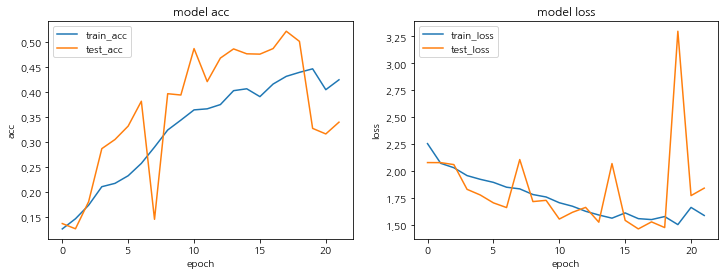

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) ## 1행2열의 도표, 1열
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc','test_acc'])

plt.subplot(1, 2, 2) ## 1행2열의 도표, 2열
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','test_loss'])